In [22]:
%matplotlib inline
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from functools import reduce
import warnings
warnings.filterwarnings('ignore')

In [23]:
data = pd.read_csv('X_train.csv')
target = pd.read_csv('y_train.csv')
test = pd.read_csv('X_test.csv')

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 487680 entries, 0 to 487679
Data columns (total 13 columns):
row_id                   487680 non-null object
series_id                487680 non-null int64
measurement_number       487680 non-null int64
orientation_X            487680 non-null float64
orientation_Y            487680 non-null float64
orientation_Z            487680 non-null float64
orientation_W            487680 non-null float64
angular_velocity_X       487680 non-null float64
angular_velocity_Y       487680 non-null float64
angular_velocity_Z       487680 non-null float64
linear_acceleration_X    487680 non-null float64
linear_acceleration_Y    487680 non-null float64
linear_acceleration_Z    487680 non-null float64
dtypes: float64(10), int64(2), object(1)
memory usage: 48.4+ MB


In [25]:
print(data.shape)
data.head()

(487680, 13)


row_id  series_id  measurement_number  orientation_X  orientation_Y  \
0    0_0          0                   0       -0.75853       -0.63435   
1    0_1          0                   1       -0.75853       -0.63434   
2    0_2          0                   2       -0.75853       -0.63435   
3    0_3          0                   3       -0.75852       -0.63436   
4    0_4          0                   4       -0.75852       -0.63435   

   orientation_Z  orientation_W  angular_velocity_X  angular_velocity_Y  \
0       -0.10488       -0.10597            0.107650            0.017561   
1       -0.10490       -0.10600            0.067851            0.029939   
2       -0.10492       -0.10597            0.007275            0.028934   
3       -0.10495       -0.10597           -0.013053            0.019448   
4       -0.10495       -0.10596            0.005135            0.007652   

   angular_velocity_Z  linear_acceleration_X  linear_acceleration_Y  \
0            0.000767               -0.74857                 2.1030   
1            0.003385                0.33995                 1.5064   
2           -0.005978               -0.26429                 1.5922   
3           -0.008974                0.42684                 1.0993   
4            0.005245               -0.50969                 1.4689   

   linear_acceleration_Z  
0                -9.7532  
1                -9.4128  
2                -8.7267  
3               -10.0960  
4               -10.4410

In [26]:
data.describe()

series_id  measurement_number  orientation_X  orientation_Y  \
count  487680.000000       487680.000000  487680.000000  487680.000000   
mean     1904.500000           63.500000      -0.018050       0.075062   
std      1099.853353           36.949327       0.685696       0.708226   
min         0.000000            0.000000      -0.989100      -0.989650   
25%       952.000000           31.750000      -0.705120      -0.688980   
50%      1904.500000           63.500000      -0.105960       0.237855   
75%      2857.000000           95.250000       0.651803       0.809550   
max      3809.000000          127.000000       0.989100       0.988980   

       orientation_Z  orientation_W  angular_velocity_X  angular_velocity_Y  \
count  487680.000000  487680.000000       487680.000000       487680.000000   
mean        0.012458      -0.003804            0.000178            0.008338   
std         0.105972       0.104299            0.117764            0.088677   
min        -0.162830      -0.156620           -2.371000           -0.927860   
25%        -0.089466      -0.106060           -0.040752           -0.033191   
50%         0.031949      -0.018704            0.000084            0.005412   
75%         0.122870       0.097215            0.040527            0.048068   
max         0.155710       0.154770            2.282200            1.079100   

       angular_velocity_Z  linear_acceleration_X  linear_acceleration_Y  \
count       487680.000000          487680.000000          487680.000000   
mean            -0.019184               0.129281               2.886468   
std              0.229153               1.870600               2.140067   
min             -1.268800             -36.067000            -121.490000   
25%             -0.090743              -0.530833               1.957900   
50%             -0.005335               0.124980               2.879600   
75%              0.064604               0.792263               3.798800   
max              1.387300              36.797000              73.008000   

       linear_acceleration_Z  
count          487680.000000  
mean               -9.364886  
std                 2.845341  
min               -75.386000  
25%               -10.193000  
50%                -9.365300  
75%                -8.522700  
max                65.839000

In [27]:
target.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3810 entries, 0 to 3809
Data columns (total 3 columns):
series_id    3810 non-null int64
group_id     3810 non-null int64
surface      3810 non-null object
dtypes: int64(2), object(1)
memory usage: 89.4+ KB


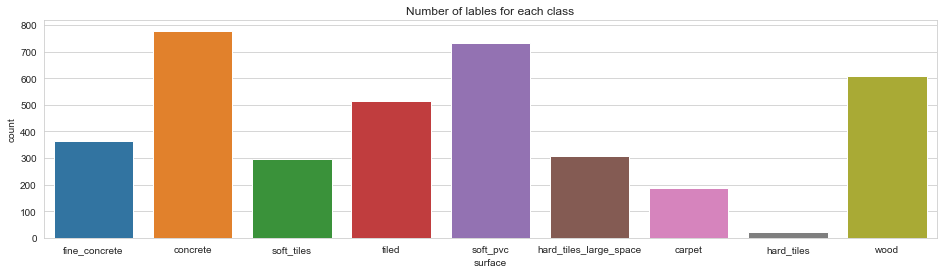

In [28]:
f, ax = plt.subplots(1, 1, figsize=(16,4))
g = sns.countplot(target['surface'])
g.set_title("Number of lables for each class")
plt.show()

In [29]:
def plot_feature_distribution(df1, df2, label1, label2, features):
    i = 0
    sns.set_style('whitegrid')
    plt.figure()
    fig, ax = plt.subplots(2,5,figsize=(16,8))

    for feature in features:
        i += 1
        plt.subplot(2,5,i)
        sns.kdeplot(df1[feature], bw=0.5,label=label1)
        sns.kdeplot(df2[feature], bw=0.5,label=label2)
        plt.xlabel(feature, fontsize=9)
        locs, labels = plt.xticks()
        plt.tick_params(axis='x', which='major', labelsize=8)
        plt.tick_params(axis='y', which='major', labelsize=8)
    plt.show();

<Figure size 432x288 with 0 Axes>

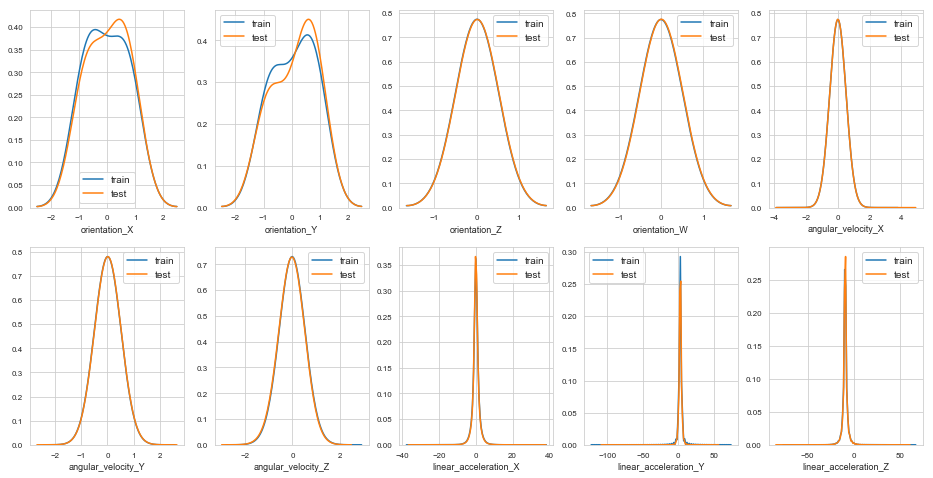

In [30]:
features = data.columns.values[3:]
plot_feature_distribution(data, test, 'train', 'test', features)

In [31]:
def plot_feature_class_distribution(classes,tt, features):
    i = 0
    sns.set_style('whitegrid')
    plt.figure()
    fig, ax = plt.subplots(5,2,figsize=(16,24))

    for feature in features:
        i += 1
        plt.subplot(5,2,i)
        for clas in classes:
            ttc = tt[tt['surface']==clas]
            sns.kdeplot(ttc[feature], bw=0.5,label=clas)
        plt.xlabel(feature, fontsize=9)
        locs, labels = plt.xticks()
        plt.tick_params(axis='x', which='major', labelsize=8)
        plt.tick_params(axis='y', which='major', labelsize=8)
    plt.show();

<Figure size 432x288 with 0 Axes>

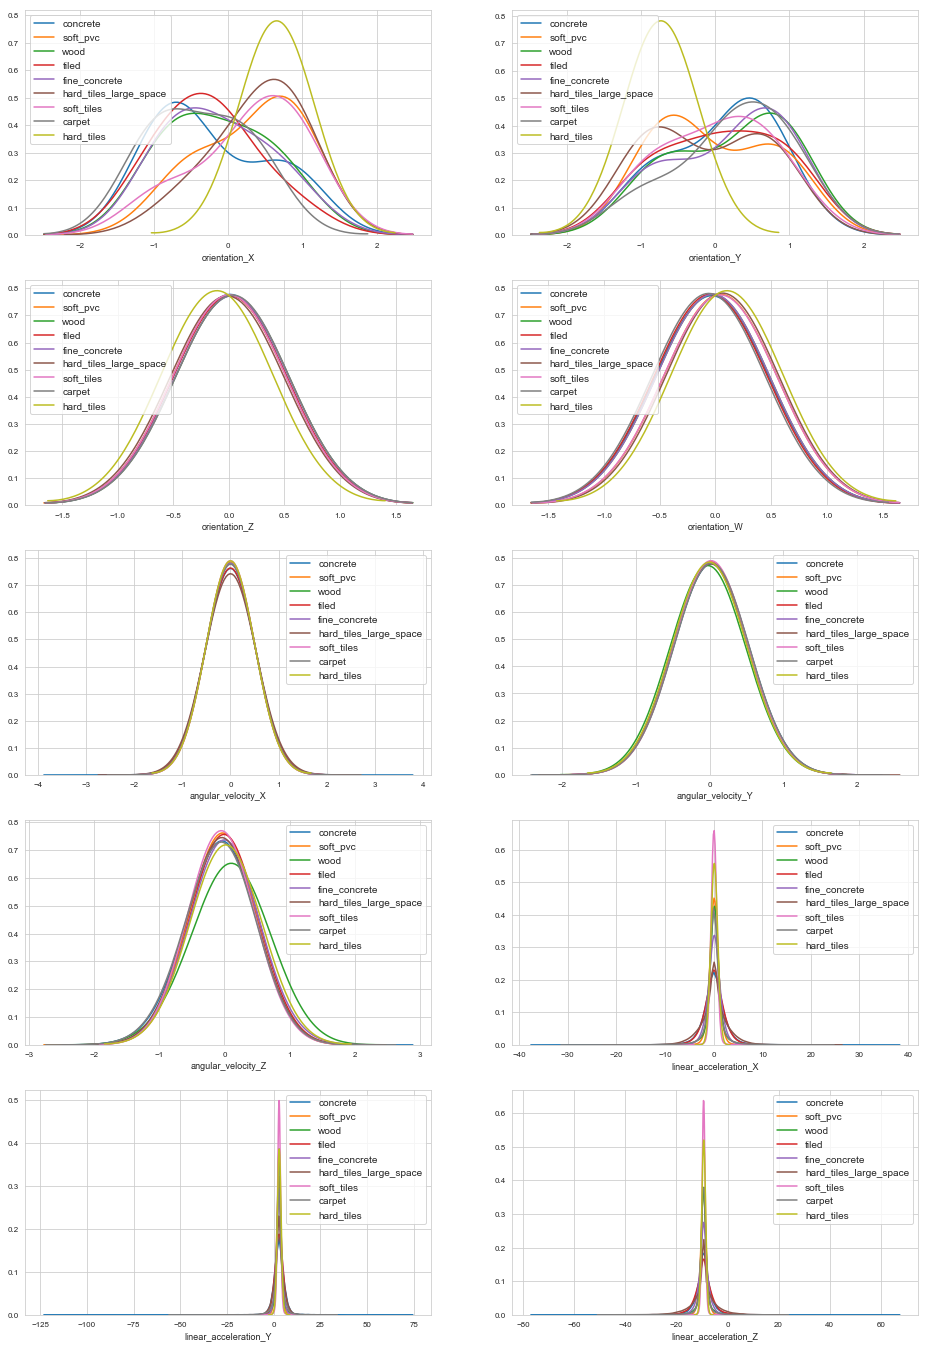

In [37]:
classes = (target['surface'].value_counts()).index
tt = data.merge(target, on='series_id', how='inner')
plot_feature_class_distribution(classes, tt, features)

In [38]:
classes

Index(['concrete', 'soft_pvc', 'wood', 'tiled', 'fine_concrete',
       'hard_tiles_large_space', 'soft_tiles', 'carpet', 'hard_tiles'],
      dtype='object')

In [44]:
def quaternion_to_euler(x, y, z, w):
    import math
    t0 = +2.0 * (w * x + y * z)
    t1 = +1.0 - 2.0 * (x * x + y * y)
    X = math.atan2(t0, t1)

    t2 = +2.0 * (w * y - z * x)
    t2 = +1.0 if t2 > +1.0 else t2
    t2 = -1.0 if t2 < -1.0 else t2
    Y = math.asin(t2)

    t3 = +2.0 * (w * z + x * y)
    t4 = +1.0 - 2.0 * (y * y + z * z)
    Z = math.atan2(t3, t4)

    return X, Y, Z

def fe(actual):
    new = pd.DataFrame()
    actual['total_angular_velocity'] = (actual['angular_velocity_X'] ** 2 + actual['angular_velocity_Y'] ** 2 + actual['angular_velocity_Z'] ** 2) ** 0.5
    actual['total_linear_acceleration'] = (actual['linear_acceleration_X'] ** 2 + actual['linear_acceleration_Y'] ** 2 + actual['linear_acceleration_Z'] ** 2) ** 0.5
    
    actual['acc_vs_vel'] = actual['total_linear_acceleration'] / actual['total_angular_velocity']
    
    x, y, z, w = actual['orientation_X'].tolist(), actual['orientation_Y'].tolist(), actual['orientation_Z'].tolist(), actual['orientation_W'].tolist()
    nx, ny, nz = [], [], []
    for i in range(len(x)):
        xx, yy, zz = quaternion_to_euler(x[i], y[i], z[i], w[i])
        nx.append(xx)
        ny.append(yy)
        nz.append(zz)
    
    actual['euler_x'] = nx
    actual['euler_y'] = ny
    actual['euler_z'] = nz
    
    actual['total_angle'] = (actual['euler_x'] ** 2 + actual['euler_y'] ** 2 + actual['euler_z'] ** 2) ** 5
    actual['angle_vs_acc'] = actual['total_angle'] / actual['total_linear_acceleration']
    actual['angle_vs_vel'] = actual['total_angle'] / actual['total_angular_velocity']
    
    def f1(x):
        return np.mean(np.diff(np.abs(np.diff(x))))
    
    def f2(x):
        return np.mean(np.abs(np.diff(x)))
    
    for col in actual.columns:
        if col in ['row_id', 'series_id', 'measurement_number']:
            continue
        new[col + '_mean'] = actual.groupby(['series_id'])[col].mean()
        new[col + '_min'] = actual.groupby(['series_id'])[col].min()
        new[col + '_max'] = actual.groupby(['series_id'])[col].max()
        new[col + '_std'] = actual.groupby(['series_id'])[col].std()
        new[col + '_max_to_min'] = new[col + '_max'] / new[col + '_min']
        
        # Change. 1st order.
        new[col + '_mean_abs_change'] = actual.groupby('series_id')[col].apply(f2)
        
        # Change of Change. 2nd order.
        new[col + '_mean_change_of_abs_change'] = actual.groupby('series_id')[col].apply(f1)
        
        new[col + '_abs_max'] = actual.groupby('series_id')[col].apply(lambda x: np.max(np.abs(x)))
        new[col + '_abs_min'] = actual.groupby('series_id')[col].apply(lambda x: np.min(np.abs(x)))

    return new

In [46]:
%%time
data = fe(data)
test = fe(test)
data.head()

Wall time: 2min 22s


In [48]:
data.shape

(3810, 171)

In [51]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, confusion_matrix

from bayes_opt import BayesianOptimization
import lightgbm as lgb
import xgboost as xgb
import catboost as cb

In [52]:
le = LabelEncoder()
target['surface'] = le.fit_transform(target['surface'])

In [53]:
data.fillna(0, inplace = True)
test.fillna(0, inplace = True)

In [56]:
target.head(10)

series_id  group_id  surface
0          0        13        2
1          1        31        1
2          2        20        1
3          3        31        1
4          4        22        6
5          5         1        7
6          6        34        5
7          7        31        1
8          8        33        4
9          9        11        7

In [57]:
data.replace(-np.inf, 0, inplace = True)
data.replace(np.inf, 0, inplace = True)
test.replace(-np.inf, 0, inplace = True)
test.replace(np.inf, 0, inplace = True)

-------------------- 0 --------------------
score  0.9


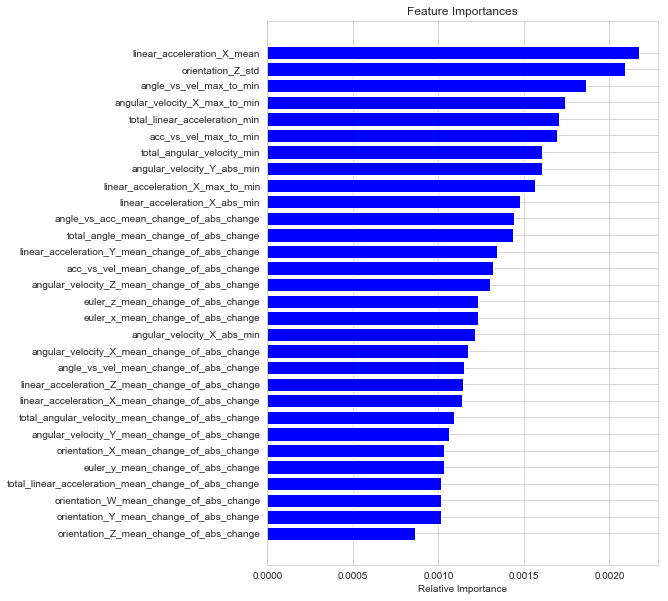

-------------------- 1 --------------------
score  0.8607594936708861


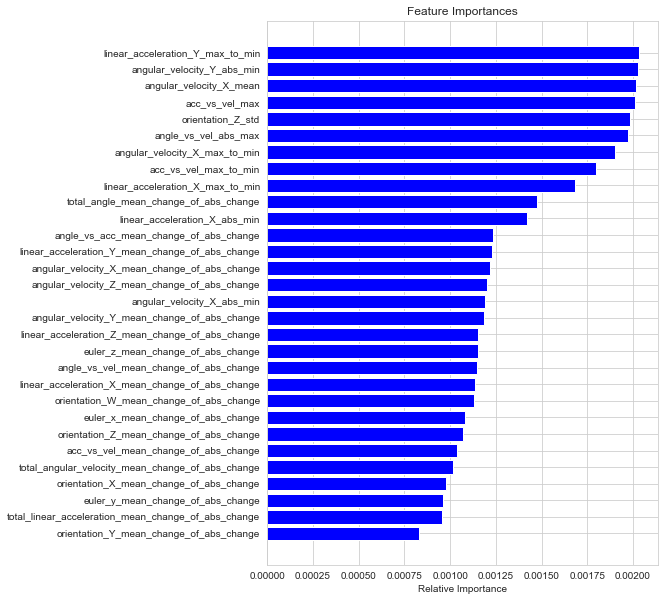

-------------------- 2 --------------------
score  0.9102564102564102


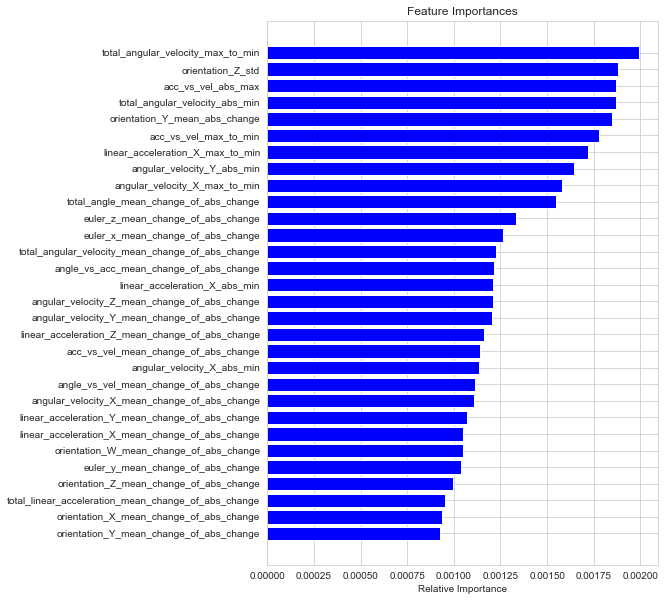

-------------------- 3 --------------------
score  0.9240506329113924


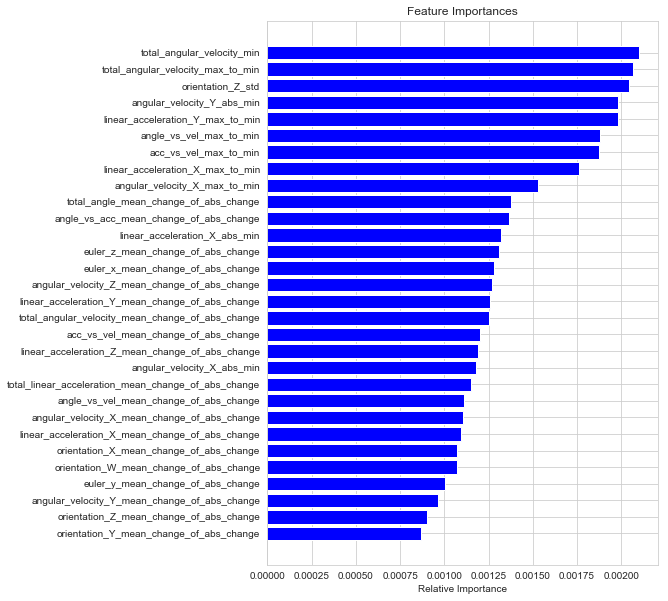

-------------------- 4 --------------------
score  0.9090909090909091


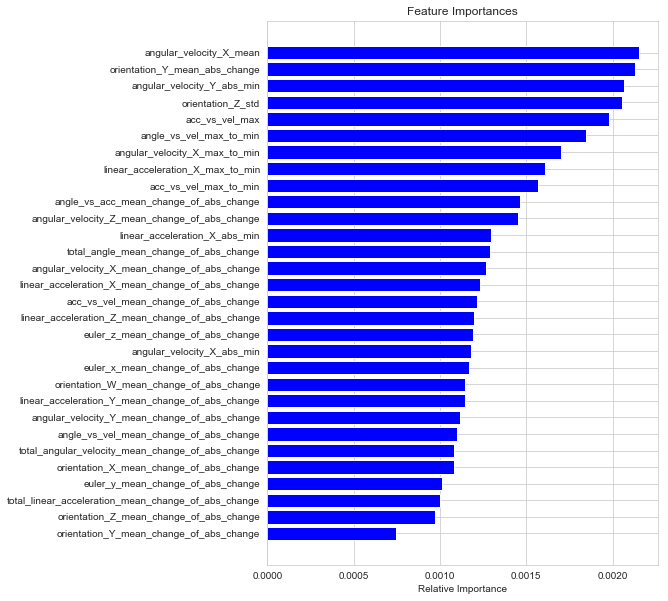

-------------------- 5 --------------------
score  0.935064935064935


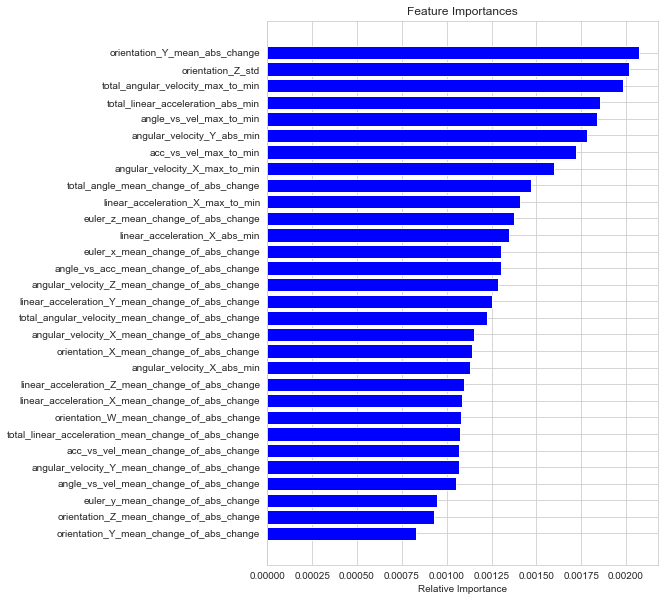

-------------------- 6 --------------------
score  0.935064935064935


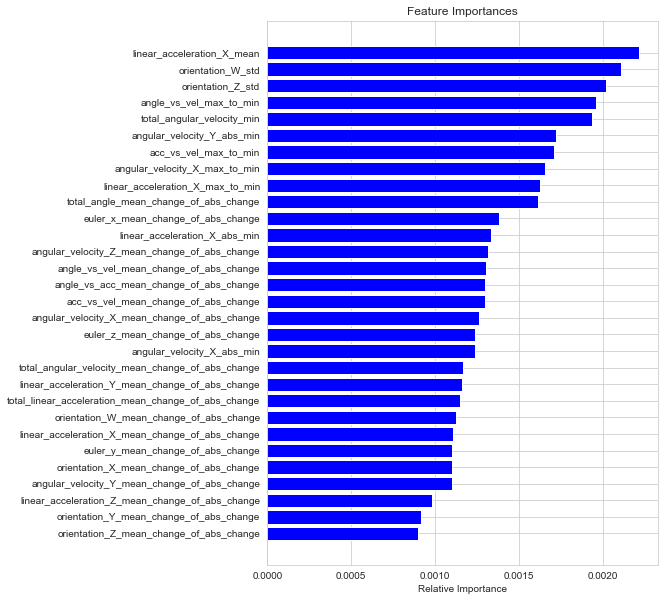

-------------------- 7 --------------------
score  0.9210526315789473


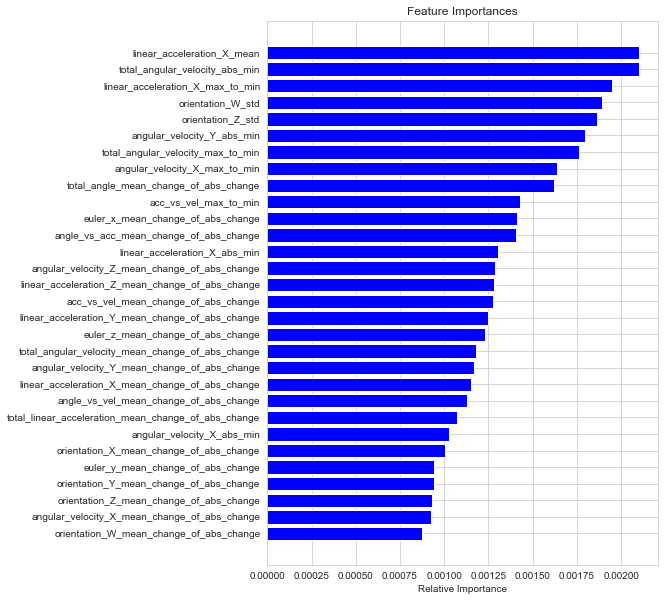

-------------------- 8 --------------------
score  0.935064935064935


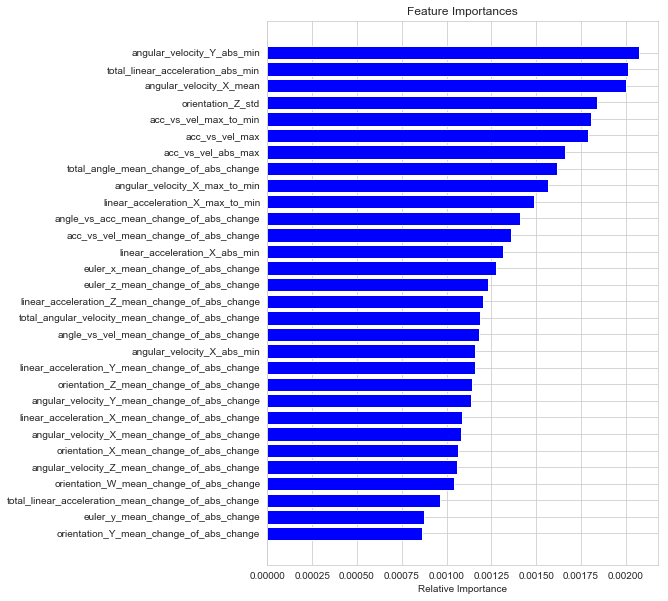

-------------------- 9 --------------------
score  0.9210526315789473


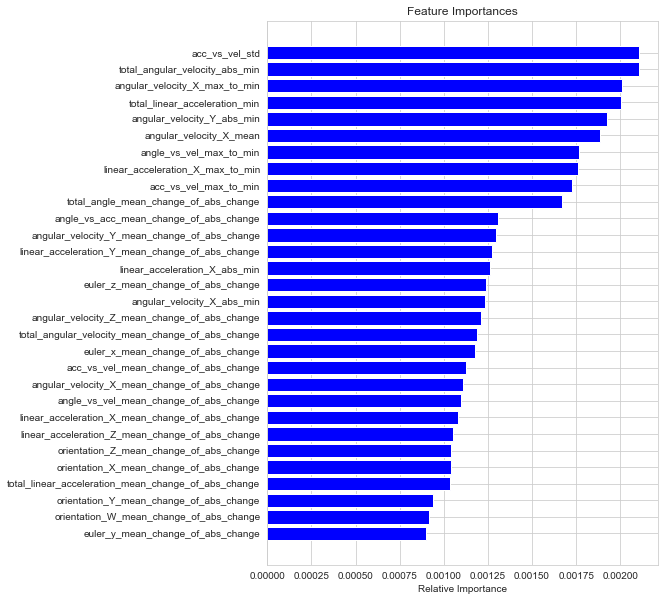

-------------------- 10 --------------------
score  0.9342105263157895


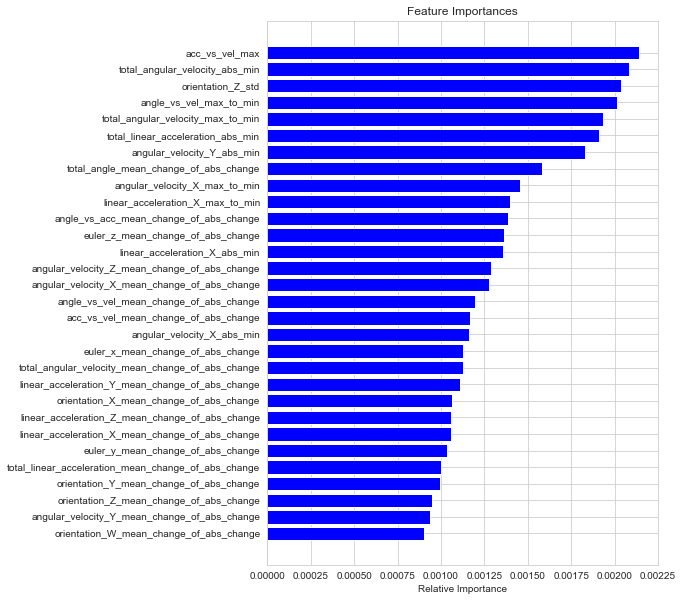

-------------------- 11 --------------------
score  0.935064935064935


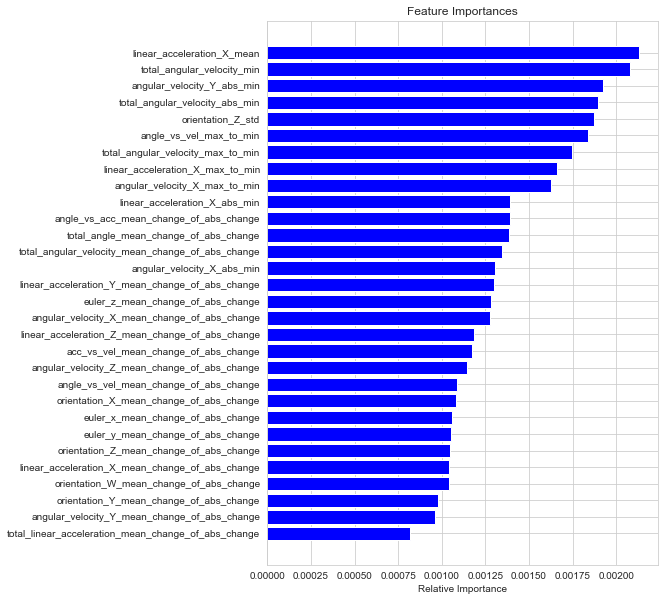

-------------------- 12 --------------------
score  0.9078947368421053


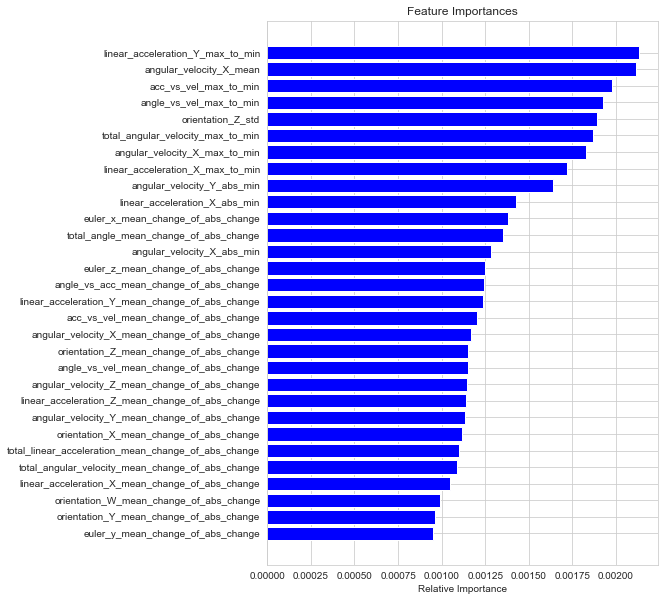

-------------------- 13 --------------------
score  0.8831168831168831


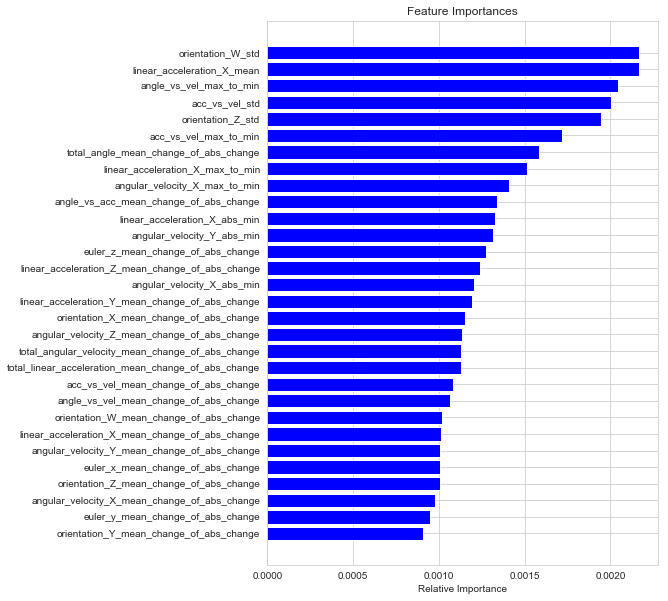

-------------------- 14 --------------------
score  0.9210526315789473


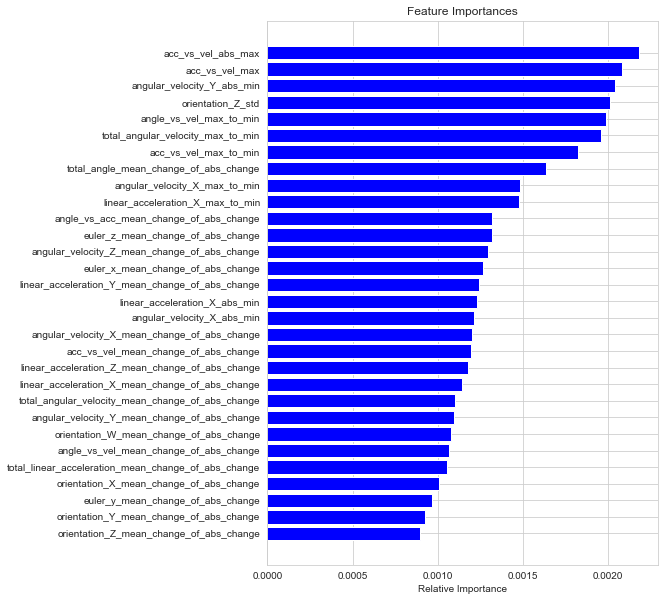

-------------------- 15 --------------------
score  0.9466666666666667


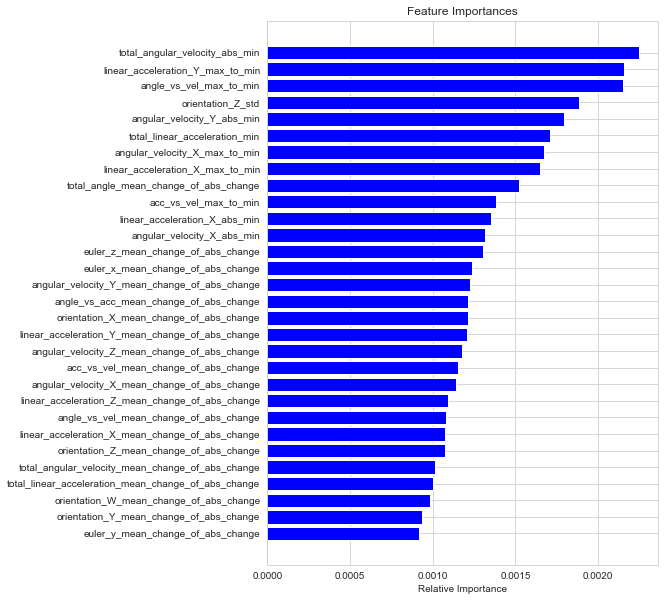

-------------------- 16 --------------------
score  0.8947368421052632


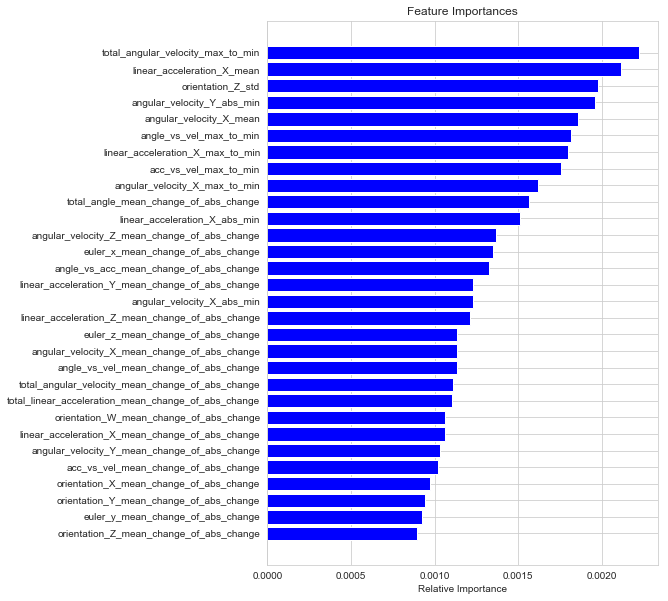

-------------------- 17 --------------------
score  0.9473684210526315


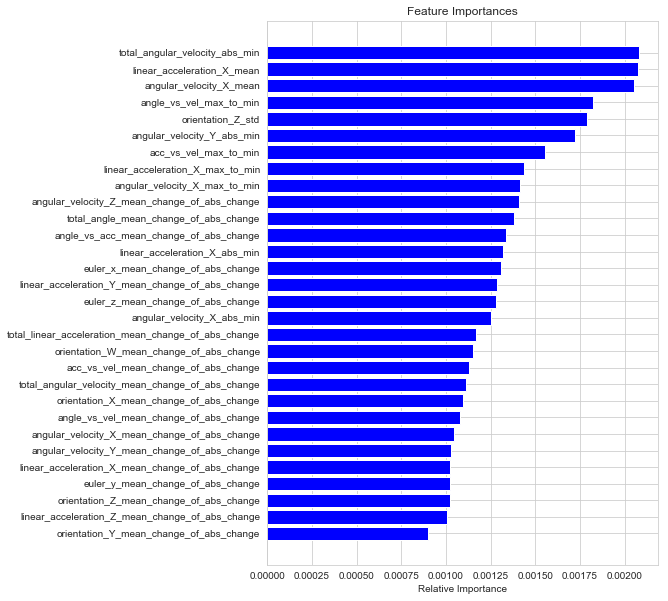

-------------------- 18 --------------------
score  0.9054054054054054


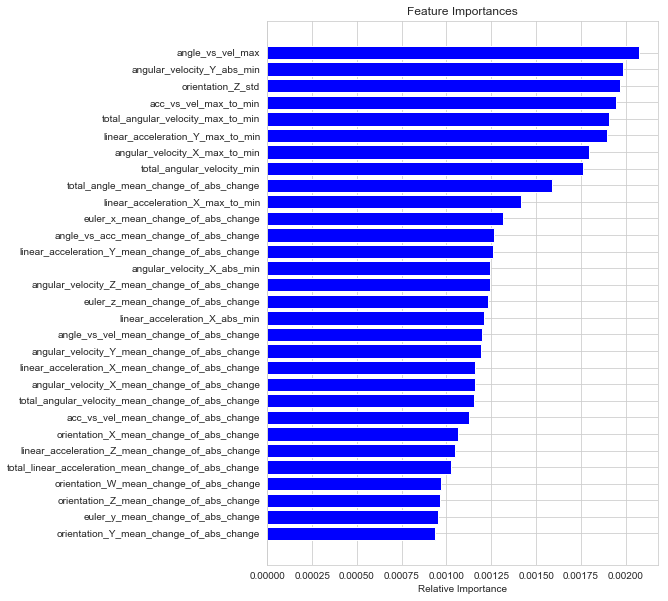

-------------------- 19 --------------------
score  0.9333333333333333


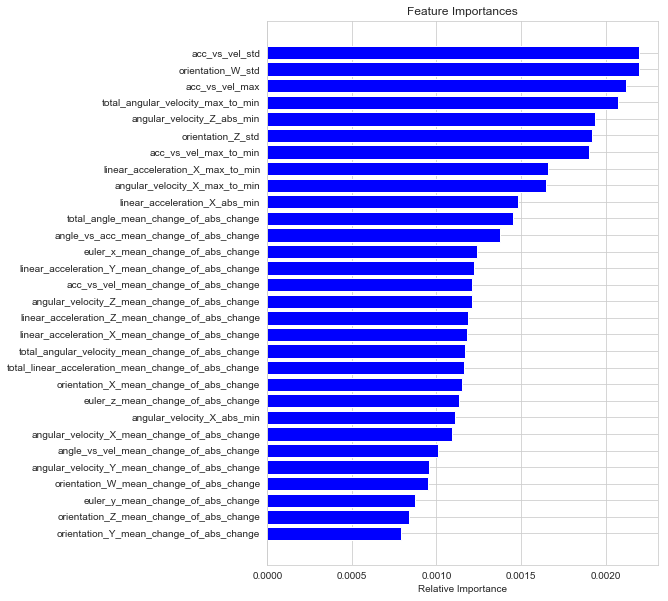

-------------------- 20 --------------------
score  0.9066666666666666


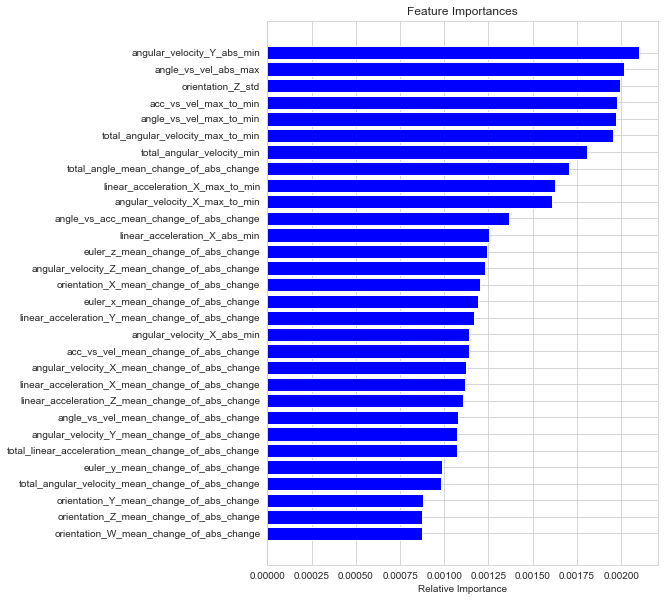

-------------------- 21 --------------------
score  0.8133333333333334


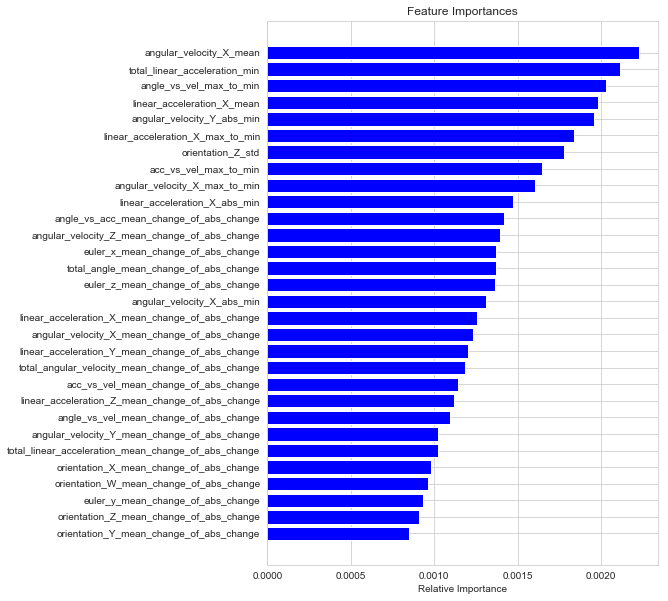

-------------------- 22 --------------------
score  0.918918918918919


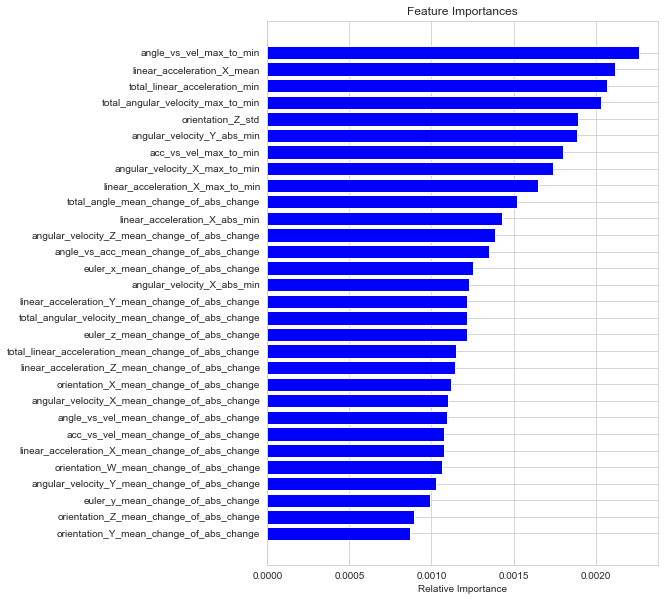

-------------------- 23 --------------------
score  0.918918918918919


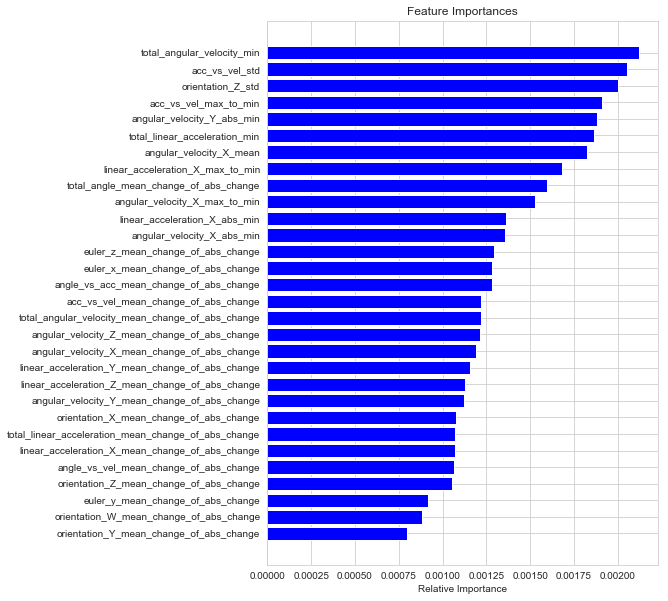

-------------------- 24 --------------------
score  0.9324324324324325


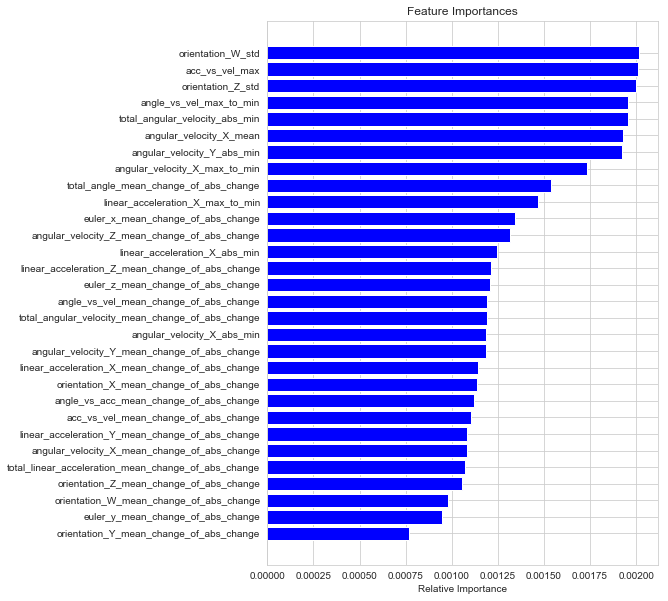

-------------------- 25 --------------------
score  0.9333333333333333


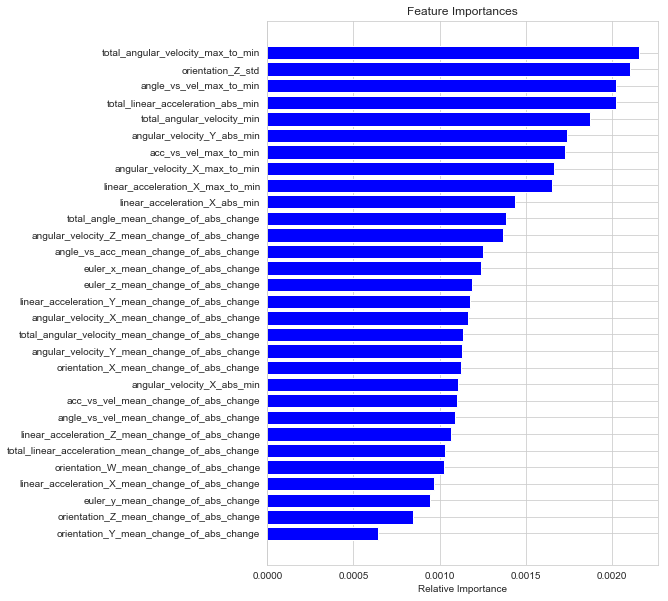

-------------------- 26 --------------------
score  0.9733333333333334


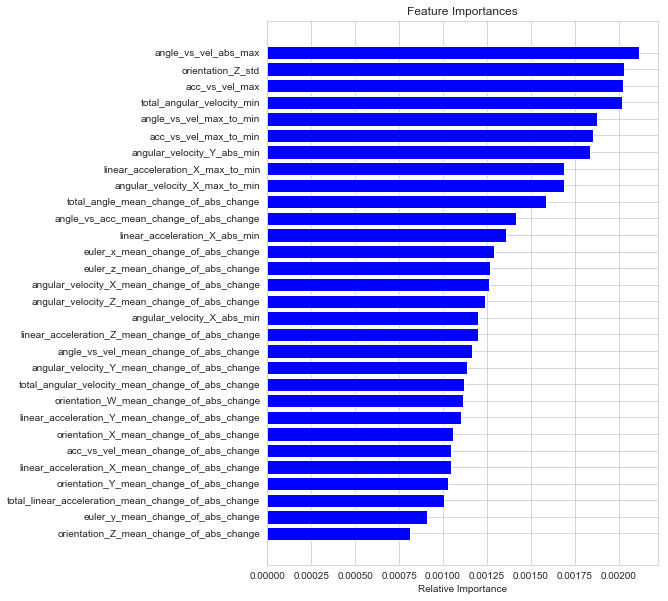

-------------------- 27 --------------------
score  0.9459459459459459


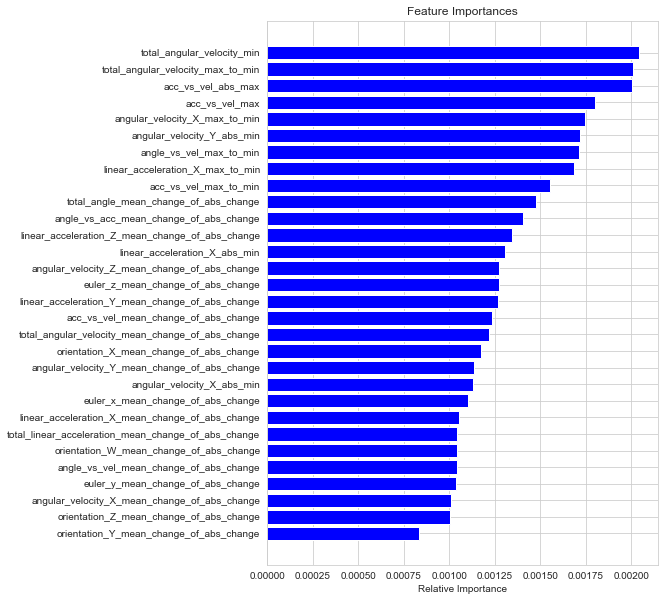

-------------------- 28 --------------------
score  0.8533333333333334


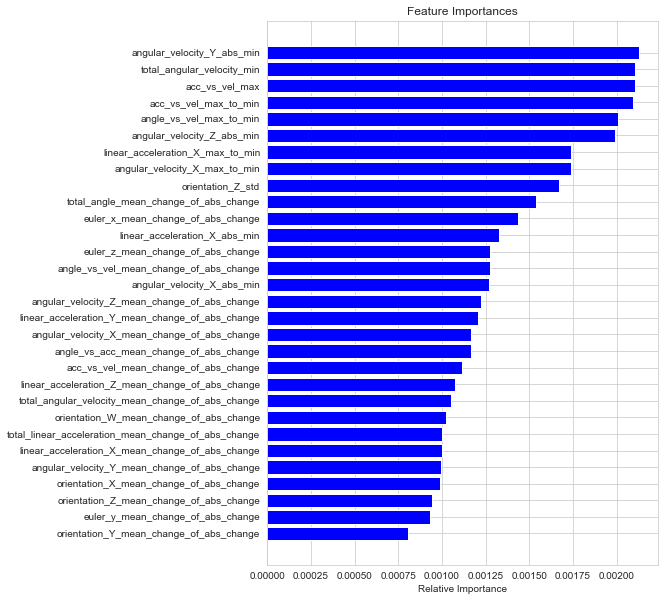

-------------------- 29 --------------------
score  0.9054054054054054


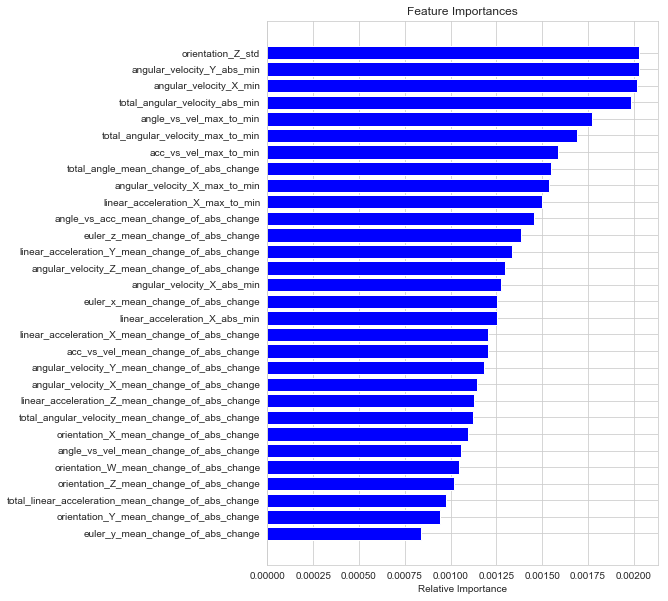

-------------------- 30 --------------------
score  0.918918918918919


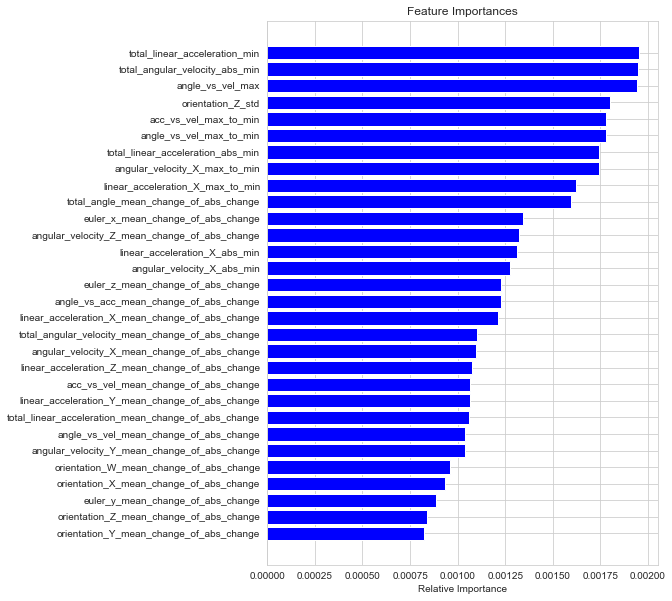

-------------------- 31 --------------------
score  0.8783783783783784


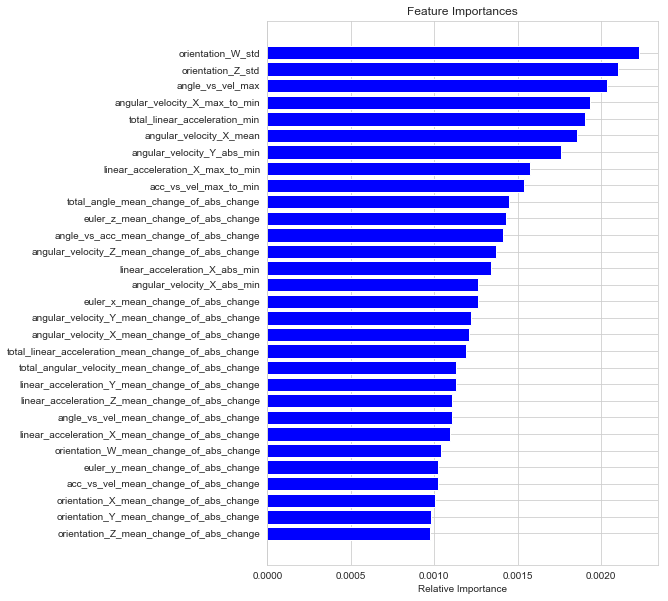

-------------------- 32 --------------------
score  0.918918918918919


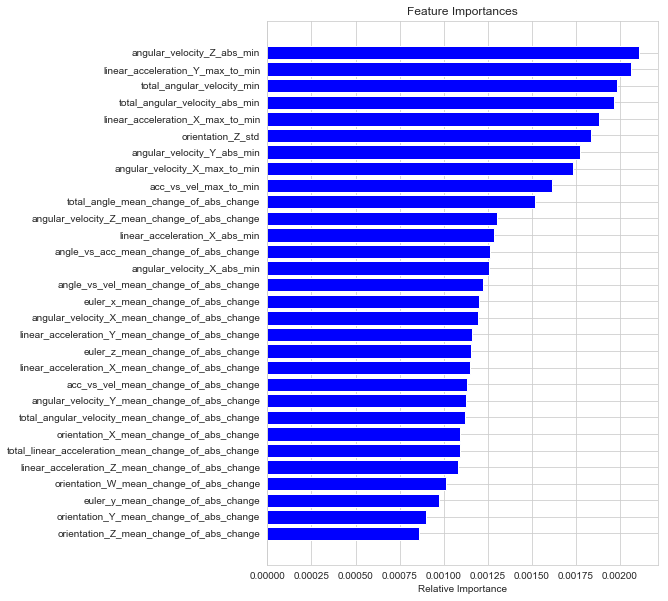

-------------------- 33 --------------------
score  0.9054054054054054


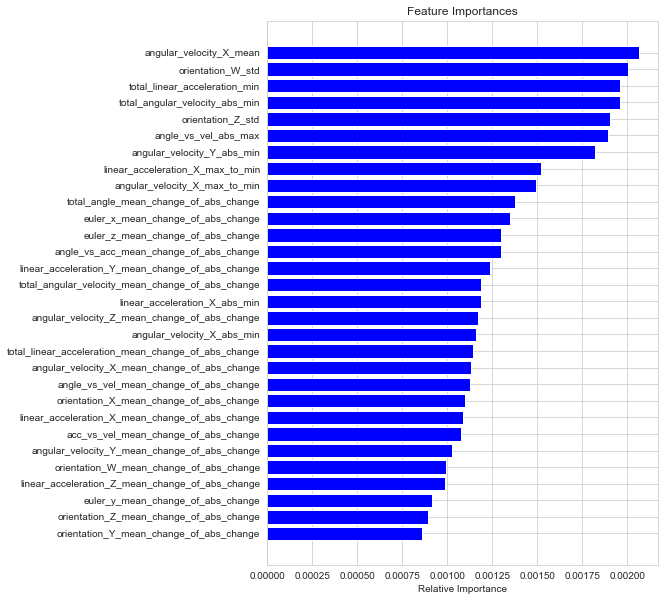

-------------------- 34 --------------------
score  0.92


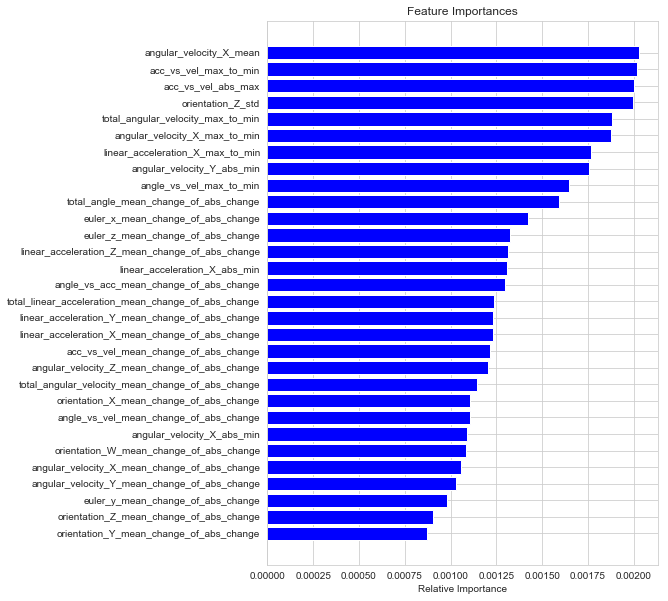

-------------------- 35 --------------------
score  0.9324324324324325


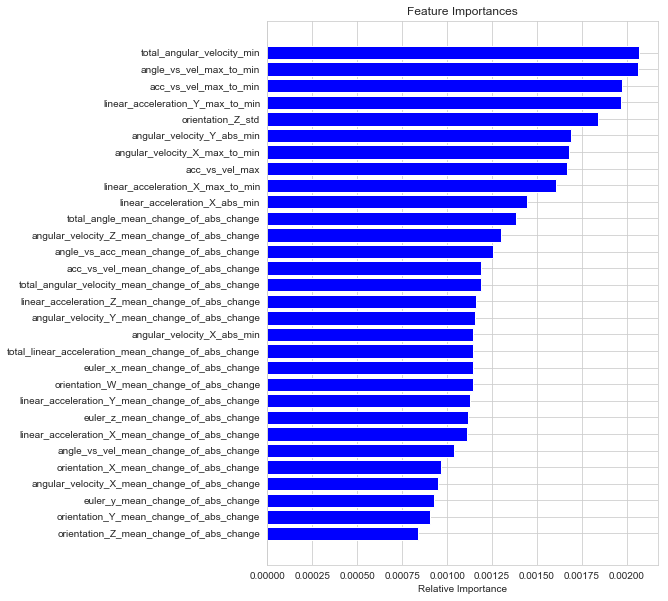

-------------------- 36 --------------------
score  0.9178082191780822


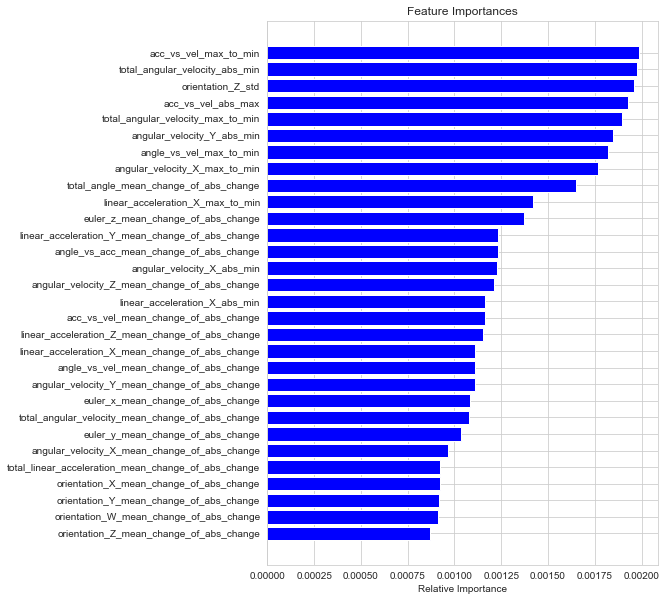

-------------------- 37 --------------------
score  0.972972972972973


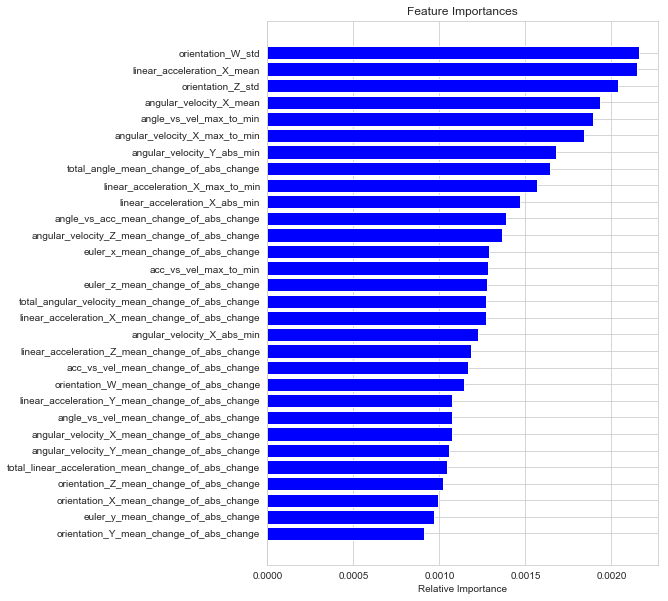

-------------------- 38 --------------------
score  0.8904109589041096


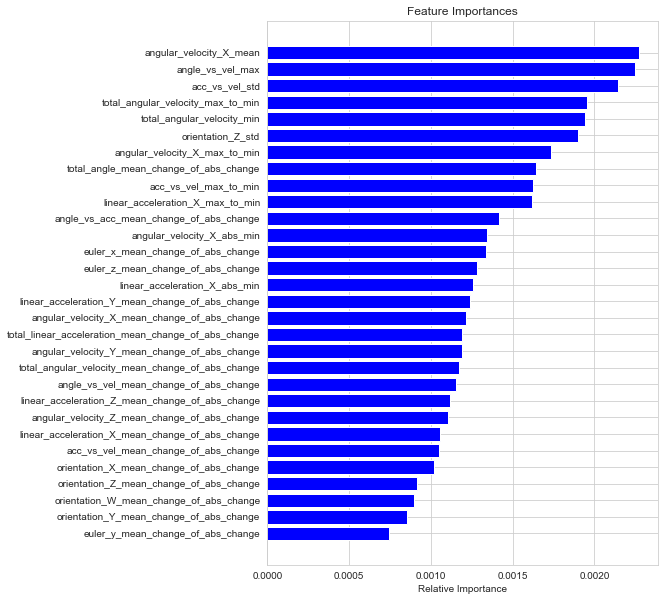

-------------------- 39 --------------------
score  0.9726027397260274


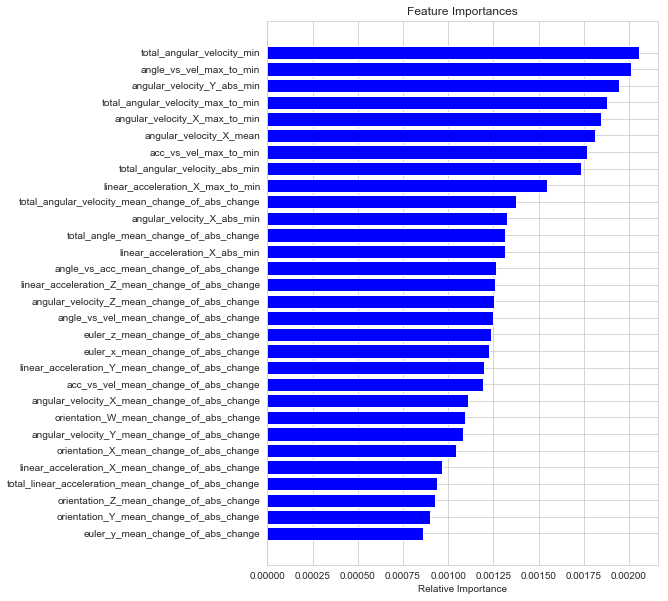

-------------------- 40 --------------------
score  0.8243243243243243


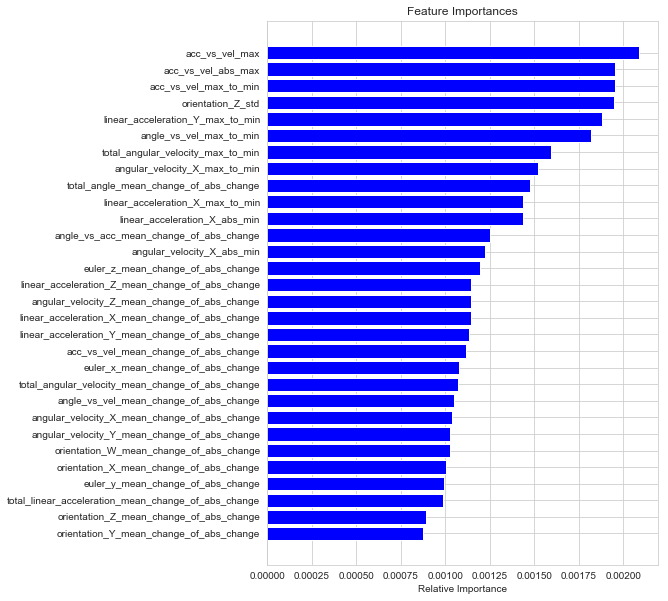

-------------------- 41 --------------------
score  0.9178082191780822


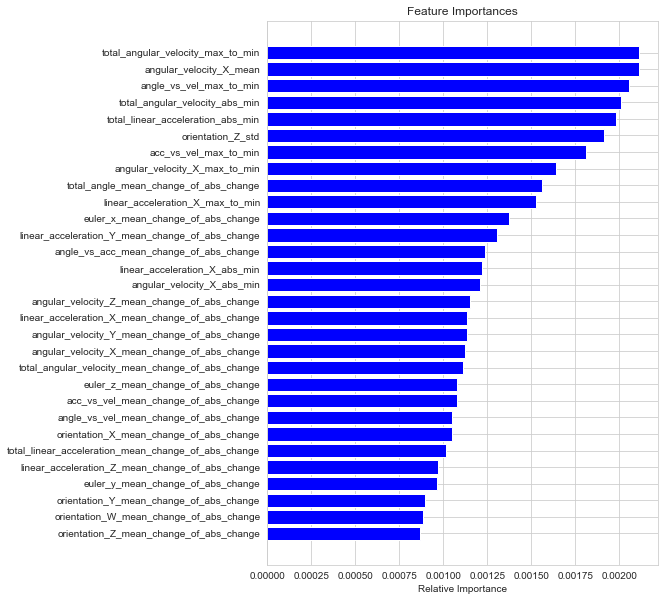

-------------------- 42 --------------------
score  0.9863013698630136


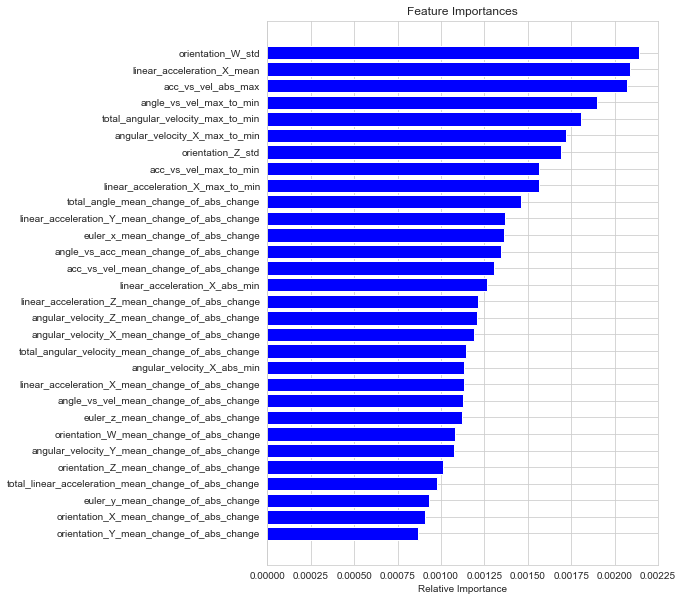

-------------------- 43 --------------------
score  0.9041095890410958


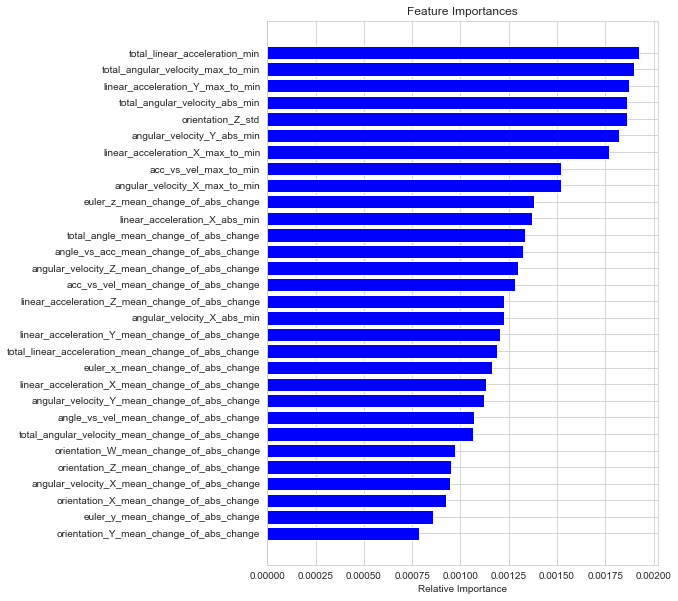

-------------------- 44 --------------------
score  0.8472222222222222


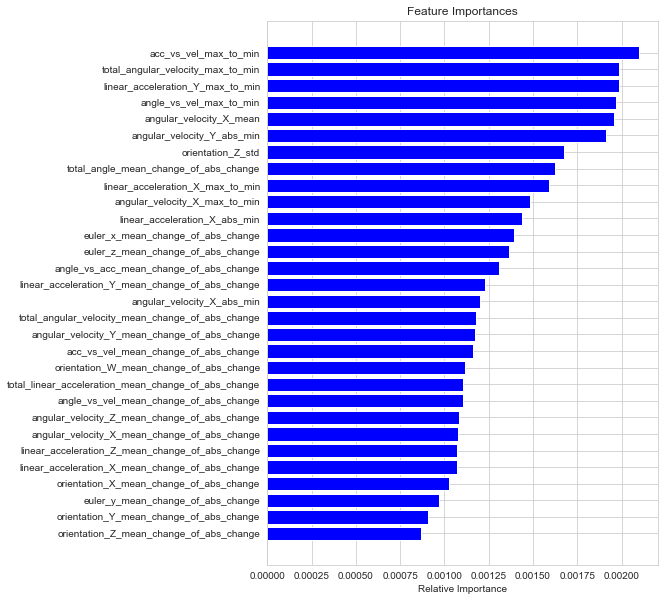

-------------------- 45 --------------------
score  0.9861111111111112


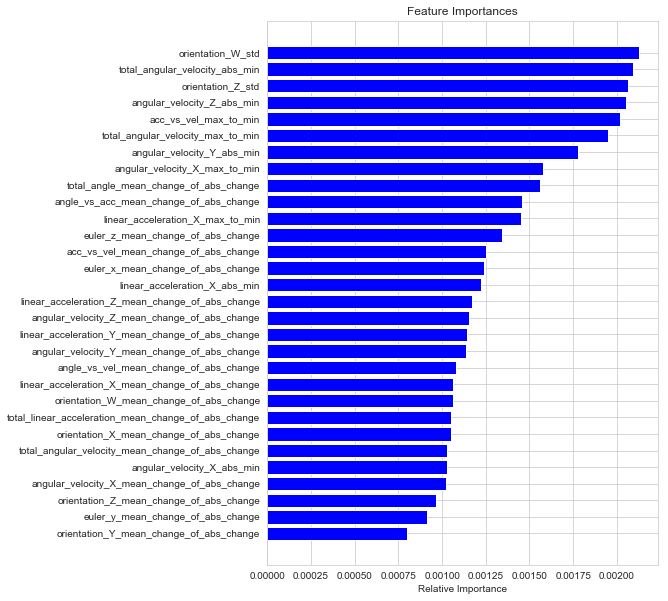

-------------------- 46 --------------------
score  0.9305555555555556


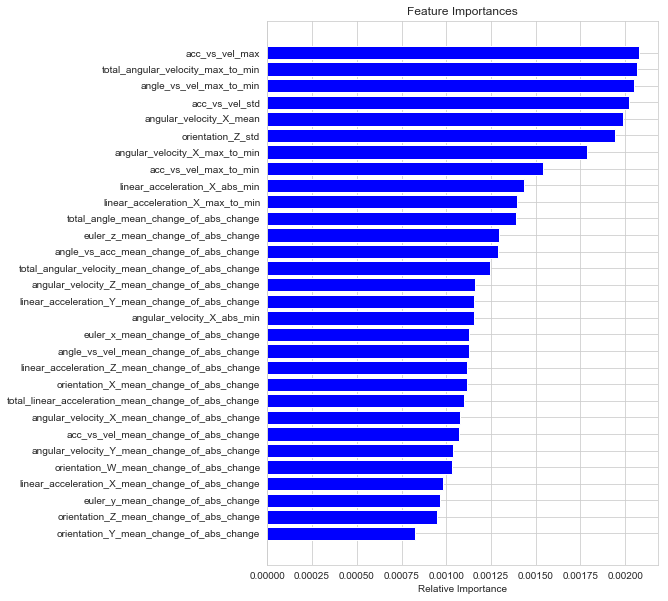

-------------------- 47 --------------------
score  0.9014084507042254


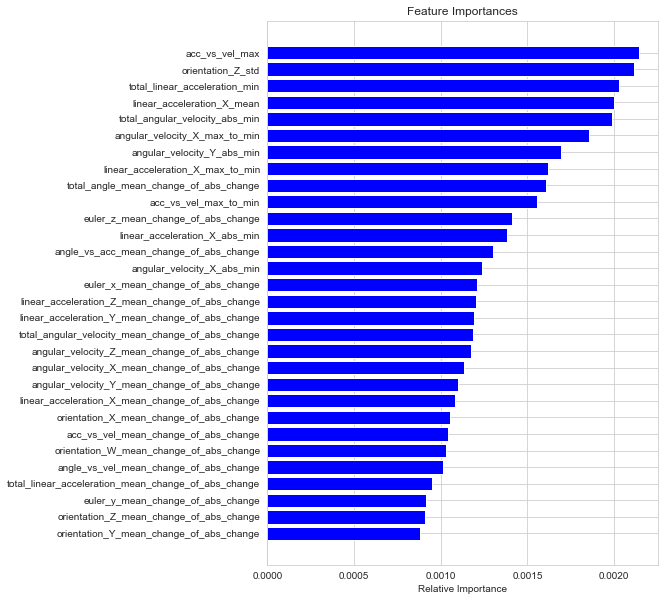

-------------------- 48 --------------------
score  0.9154929577464789


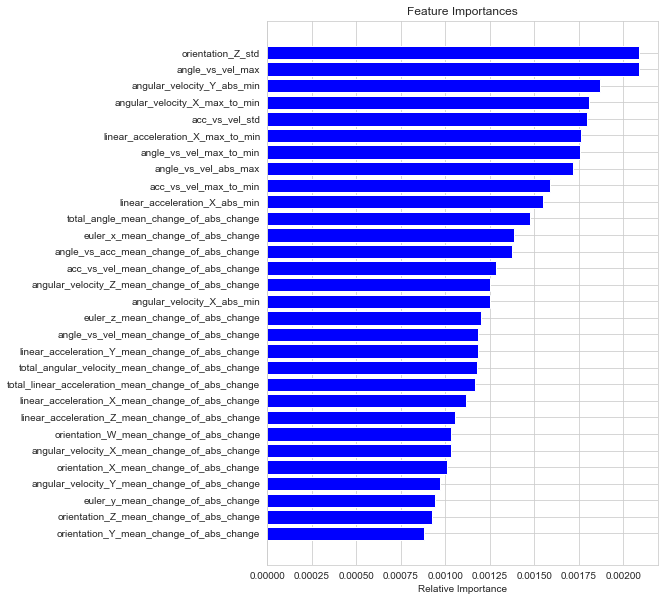

-------------------- 49 --------------------
score  0.8873239436619719


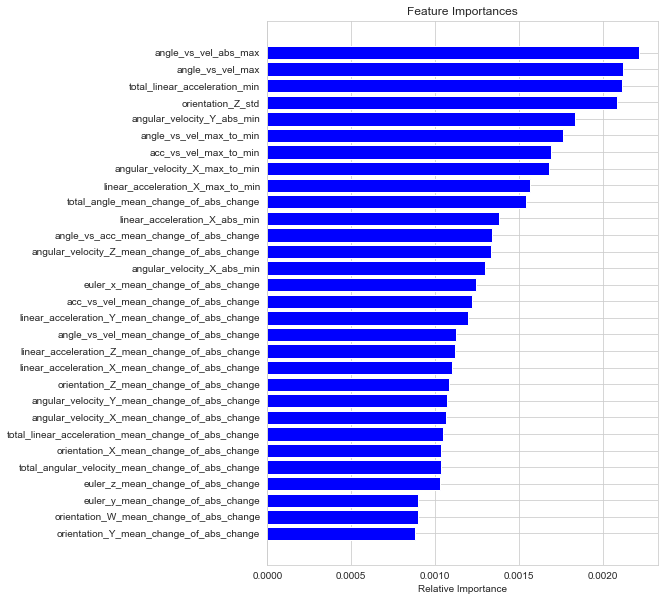

-------------------- 50 --------------------
score  0.9154929577464789


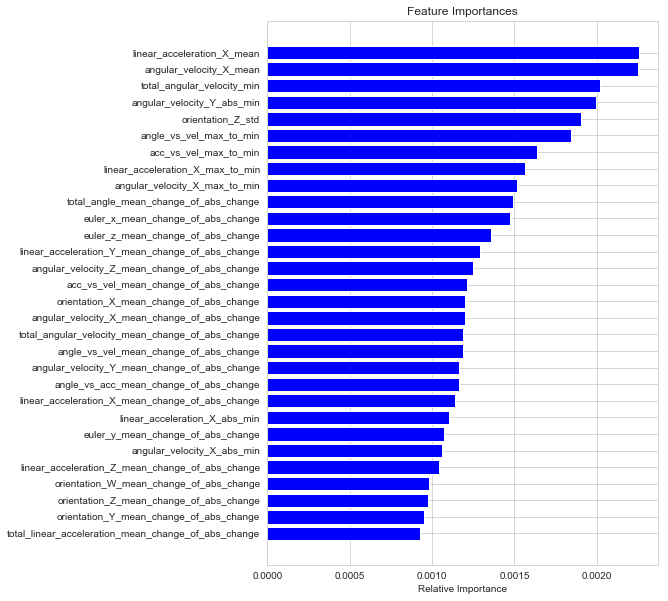

Avg Accuracy 0.9158025326152099


In [64]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold, StratifiedKFold
folds = StratifiedKFold(n_splits=51, shuffle=True, random_state=589)
sub_preds_rf = np.zeros((test.shape[0], 9))
oof_preds_rf = np.zeros((data.shape[0]))
score = 0
for i, (train_index, test_index) in enumerate(folds.split(data, target['surface'])):
    print('-'*20, i, '-'*20)
    
    clf =  RandomForestClassifier(n_estimators = 200, n_jobs = -1)
    clf.fit(data.iloc[train_index], target['surface'][train_index])
    oof_preds_rf[test_index] = clf.predict(data.iloc[test_index])
    sub_preds_rf += clf.predict_proba(test) / folds.n_splits
    score += clf.score(data.iloc[test_index], target['surface'][test_index])
    print('score ', clf.score(data.iloc[test_index], target['surface'][test_index]))
    importances = clf.feature_importances_
    indices = np.argsort(importances)
    features = data.columns

    hm = 30
    plt.figure(figsize=(7, 10))
    plt.title('Feature Importances')
    plt.barh(range(len(indices[:hm])), importances[indices][:hm], color='b', align='center')
    plt.yticks(range(len(indices[:hm])), [features[i] for i in indices])
    plt.xlabel('Relative Importance')
    plt.show()

print('Avg Accuracy', score / folds.n_splits)

In [65]:
import itertools

def plot_confusion_matrix(truth, pred, classes, normalize=False, title=''):
    cm = confusion_matrix(truth, pred)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    
    plt.figure(figsize=(10, 10))
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title('Confusion matrix', size=15)
    plt.colorbar(fraction=0.046, pad=0.04)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.grid(False)
    plt.tight_layout()

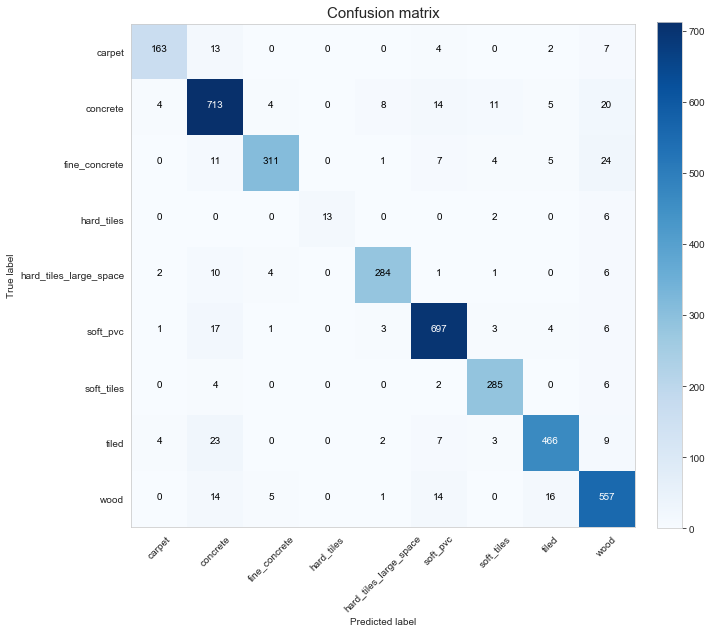

In [66]:
plot_confusion_matrix(target['surface'], oof_preds_rf, le.classes_)

In [68]:
ss = pd.read_csv('sample_submission.csv')

In [70]:
ss['surface'] = le.inverse_transform(sub_preds_rf.argmax(axis=1))
ss.to_csv('SC.csv', index=False)
ss.head(10)

series_id                 surface
0          0  hard_tiles_large_space
1          1                concrete
2          2                   tiled
3          3                  carpet
4          4              soft_tiles
5          5                concrete
6          6                soft_pvc
7          7                concrete
8          8                    wood
9          9                    wood